## Material for NATL60 Geophysical Model Development 
### Description of NATL60 vertical grid

 - **author** : Julien Le Sommer
 - **purpose** : counting the number of cell at each level


### Installing libraries

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} xarray
!conda install --yes --prefix {sys.prefix} netcdf4


Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

# All requested packages already installed.

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

### Importing libraries

In [74]:
import os
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt

### Reading data file

In [9]:
## path to data file 
## to be be updated before submission
maskfile = os.path.expanduser('~') + '/data/models/NATL60/NATL60-CJM165/grid/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'
ds = xr.open_dataset(maskfile, chunks={'z': 300})
ds

<xarray.Dataset>
Dimensions:       (t: 1, x: 5422, y: 3454, z: 300)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 dask.array<shape=(3454, 5422), chunksize=(3454, 5422)>
    nav_lat       (y, x) float32 dask.array<shape=(3454, 5422), chunksize=(3454, 5422)>
    nav_lev       (z) float32 dask.array<shape=(300,), chunksize=(300,)>
    time_counter  (t) float32 dask.array<shape=(1,), chunksize=(1,)>
    tmaskutil     (t, y, x) int8 dask.array<shape=(1, 3454, 5422), chunksize=(1, 3454, 5422)>
    umaskutil     (t, y, x) int8 dask.array<shape=(1, 3454, 5422), chunksize=(1, 3454, 5422)>
    vmaskutil     (t, y, x) int8 dask.array<shape=(1, 3454, 5422), chunksize=(1, 3454, 5422)>
    fmaskutil     (t, y, x) int8 dask.array<shape=(1, 3454, 5422), chunksize=(1, 3454, 5422)>
    tmask         (t, z, y, x) int8 dask.array<shape=(1, 300, 3454, 5422), chunksize=(1, 300, 3454, 5422)>
    umask         (t, z, y, x) int8 dask.array<shape=(1, 300, 3454, 5422

### Counting the number of point at each level

In [21]:
n_surface = ds.tmask[0,0,:,:].sum(axis=-1).sum(axis=-1).compute()

In [31]:
n_full =  ds.tmask[0,:,:,:].sum(axis=-1).sum(axis=-1).compute()

In [38]:
fraction_surface_area = n_full/n_surface

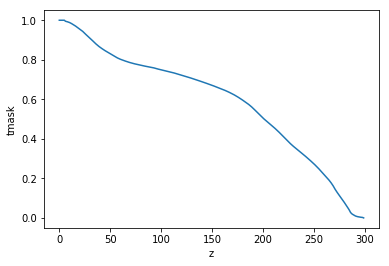

In [41]:
fraction_surface_area.plot()
plt.show()

### Writing file 

In [88]:
pds = fraction_surface_area.to_pandas()
df = pd.DataFrame(data={'fraction_area':pds})

In [91]:
df.to_csv(os.path.expanduser('~') + '/data/models/NATL60/NATL60-CJM165/grid/fraction_area_per_level.csv',header=True)